## ANALYZE WEATHER CONDITIONS FOR 500+ RANDOM CITIES WITH RESPECT TO IT'S LATITUDE AS COMPARED TO EQUATOR

### GET RANDOM CO-ORDINATES

In [134]:
# Dependencies
import json
import numpy as np
import pandas as pd
from pprint import pprint
import requests as req
import openweathermapy as owm
import config
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Generate random latitudes and longitudes
random_lat = pd.Series(np.random.randint(-90,90,size=(5500)))
random_lon = pd.Series(np.random.randint(-180,180,size=(5500)))

random_coord = pd.DataFrame({"Lat":random_lat, "Lon":random_lon}).astype('float')
random_coord.head()

,Lat,Lon
0,-19.0,51.0
1,84.0,-89.0
2,16.0,-78.0
3,29.0,-163.0
4,86.0,45.0


In [5]:
#### TEST
len(random_coord)

5500

### GET CITIES FOR RANDOM CO-ORDINATES

In [6]:
# Get cities, countries from citipy for lat and lon
city_list = []
country_list = []
for index, row in random_coord.iterrows():
    coord_obj = citipy.nearest_city(row['Lat'], row['Lon'])
    city_name = coord_obj.city_name
    country_code = coord_obj.country_code
    city_list.append(city_name)
    country_list.append(country_code)
    
#len(city_list)
len(country_list)

5500

In [7]:
# Add cities and countries to DF
random_coord['City']=city_list
random_coord['Country']=country_list
random_coord.head()
len(random_coord)

#### TEST
#x=random_coord['City'].value_counts()
#print(x)
x=random_coord['City'].unique()
print(len(x))
#print(x)

1537


In [8]:
# Drop duplicate cities
random_coord.drop_duplicates('City', inplace=True)

In [9]:
#### TEST
if citipy.nearest_city(random_coord['Lat'][3], random_coord['Lon'][3]).city_name == random_coord['City'][3]:
    print("The data collected from citipy is {} matches the city in df which is {}".format(citipy.nearest_city(random_coord['Lat'][3], random_coord['Lon'][3]).city_name,random_coord['City'][3]))
else:
    print("NOT MATCHING!!!!!!!!")

The data collected from citipy is kapaa matches the city in df which is kapaa


In [10]:
# Set labels for columns to add WEATHER data later
random_coord['Max Temp']=''
random_coord['Humidity']=''
random_coord['Cloudiness']=''
random_coord['Wind Speed']=''
random_coord=random_coord.reset_index(drop=True)
random_coord.head()
#TEST
len(random_coord)
random_coord

,Lat,Lon,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed
0,-19.0,51.0,toamasina,mg,,,,
1,84.0,-89.0,qaanaaq,gl,,,,
2,16.0,-78.0,bull savanna,jm,,,,
3,29.0,-163.0,kapaa,us,,,,
4,86.0,45.0,belushya guba,ru,,,,
5,0.0,-40.0,acarau,br,,,,
6,-74.0,157.0,bluff,nz,,,,
7,-37.0,140.0,mount gambier,au,,,,
8,-40.0,39.0,margate,za,,,,
9,62.0,-40.0,tasiilaq,gl,,,,


### CALL API AND RETRIEVE REQUIRED WEATHER INFORMATION

In [11]:
# Save config information
base_url = 'http://api.openweathermap.org/data/2.5/weather'
api_key = config.owm_key

In [12]:
# Create bins for set of 50 cities
bins = list(range(-1,1501,50))

#Create the names for the four bins
set_number = ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5', 
              'Set 6', 'Set 7', 'Set 8', 'Set 9', 'Set 10', 
              'Set 11', 'Set 12', 'Set 13', 'Set 14', 'Set 15',
              'Set 16', 'Set 17', 'Set 18', 'Set 19', 'Set 20', 
              'Set 21', 'Set 22', 'Set 23', 'Set 24', 'Set 25',
              'Set 26', 'Set 27', 'Set 28', 'Set 29', 'Set 30']
# Cut index and place the ranges into bins
random_coord['Set'] = pd.cut(random_coord.index, bins, labels=set_number)
random_coord.head()
len(random_coord)

1537

In [13]:
#### TEST
city = random_coord['City'][0]
print(city)

params = {'appid': api_key,
          'q': city,
          'units': 'metric'}

response = req.get(base_url, params=params).json()
response['main']['temp_max']

toamasina


25

In [14]:
# Iterate through lats and longs on open weather maps to get random cities
print(len(random_coord))
for index, row in random_coord.iterrows():
    time.sleep(0.5)
    
    city = row['City']
    city_set = row['Set'] 
    params = {'appid': api_key,
          'q': city,
          'units': 'imperial'}
    
    print(f"Retrieving Cities for {index} of {city_set} | {city}")
    print(f"{base_url}?appid={api_key}&q={city}&units={params['units']}")
    
    try: 
        response = req.get(base_url, params=params).json()

        random_coord.set_value(index, 'Max Temp', response['main']['temp_max'])
        random_coord.set_value(index, 'Humidity', response['main']['humidity'])
        random_coord.set_value(index, 'Cloudiness', response['clouds']['all'])
        random_coord.set_value(index, 'Wind Speed', response['wind']['speed'])
    
    except KeyError:
        print("Not Found!")

print("-------------------------")
print(" DATA RETRIEVAL COMPLETE ")
print("-------------------------")

1537
Retrieving Cities for 0 of Set 1 | toamasina
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=toamasina&units=imperial
Retrieving Cities for 1 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=qaanaaq&units=imperial
Retrieving Cities for 2 of Set 1 | bull savanna
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bull savanna&units=imperial
Retrieving Cities for 3 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kapaa&units=imperial
Retrieving Cities for 4 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=belushya guba&units=imperial
Not Found!
Retrieving Cities for 5 of Set 1 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=acarau&units=imperial
Not Found!
Retrieving Cities for 6 of Se

Retrieving Cities for 52 of Set 2 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=atambua&units=imperial
Retrieving Cities for 53 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=khatanga&units=imperial
Retrieving Cities for 54 of Set 2 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bandarbeyla&units=imperial
Retrieving Cities for 55 of Set 2 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=chuy&units=imperial
Retrieving Cities for 56 of Set 2 | chocaman
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=chocaman&units=imperial
Retrieving Cities for 57 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=arraial do cabo&units=imperial
Retrieving Cities for 58 of Set 2 | cidreira
htt

Retrieving Cities for 104 of Set 3 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=lavrentiya&units=imperial
Retrieving Cities for 105 of Set 3 | stornoway
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=stornoway&units=imperial
Not Found!
Retrieving Cities for 106 of Set 3 | lamont
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=lamont&units=imperial
Retrieving Cities for 107 of Set 3 | santa marta
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=santa marta&units=imperial
Retrieving Cities for 108 of Set 3 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tuatapere&units=imperial
Retrieving Cities for 109 of Set 3 | trofors
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=trofors&units=imperial
Retrieving Cities for 110 of Set 

Retrieving Cities for 155 of Set 4 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=butaritari&units=imperial
Retrieving Cities for 156 of Set 4 | ravar
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ravar&units=imperial
Retrieving Cities for 157 of Set 4 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=mount isa&units=imperial
Retrieving Cities for 158 of Set 4 | yining
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=yining&units=imperial
Retrieving Cities for 159 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=barentsburg&units=imperial
Not Found!
Retrieving Cities for 160 of Set 4 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vanimo&units=imperial
Retrieving Cities for 161 of Set 4 | hobart

Retrieving Cities for 206 of Set 5 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=mackay&units=imperial
Retrieving Cities for 207 of Set 5 | tougan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tougan&units=imperial
Retrieving Cities for 208 of Set 5 | myre
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=myre&units=imperial
Retrieving Cities for 209 of Set 5 | straumen
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=straumen&units=imperial
Retrieving Cities for 210 of Set 5 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=codrington&units=imperial
Retrieving Cities for 211 of Set 5 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=atuona&units=imperial
Retrieving Cities for 212 of Set 5 | dickinson
http://api.openweathe

Retrieving Cities for 258 of Set 6 | antigonish
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=antigonish&units=imperial
Retrieving Cities for 259 of Set 6 | rochelle
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=rochelle&units=imperial
Retrieving Cities for 260 of Set 6 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tsihombe&units=imperial
Not Found!
Retrieving Cities for 261 of Set 6 | praya
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=praya&units=imperial
Retrieving Cities for 262 of Set 6 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kavieng&units=imperial
Retrieving Cities for 263 of Set 6 | tres lagoas
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tres lagoas&units=imperial
Not Found!
Retrieving Cities for 264 of

Retrieving Cities for 310 of Set 7 | primo tapia
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=primo tapia&units=imperial
Retrieving Cities for 311 of Set 7 | cukai
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=cukai&units=imperial
Retrieving Cities for 312 of Set 7 | tabulbah
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tabulbah&units=imperial
Not Found!
Retrieving Cities for 313 of Set 7 | seymchan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=seymchan&units=imperial
Retrieving Cities for 314 of Set 7 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=amderma&units=imperial
Not Found!
Retrieving Cities for 315 of Set 7 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=katsuura&units=imperial
Retrieving Cities for 316 of Set

Not Found!
Retrieving Cities for 362 of Set 8 | meyungs
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=meyungs&units=imperial
Not Found!
Retrieving Cities for 363 of Set 8 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=hofn&units=imperial
Retrieving Cities for 364 of Set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=paamiut&units=imperial
Retrieving Cities for 365 of Set 8 | kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kurilsk&units=imperial
Retrieving Cities for 366 of Set 8 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=riyadh&units=imperial
Retrieving Cities for 367 of Set 8 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=dicabisagan&units=imperial
Retrieving Cities for 368 of Set 8 | tukto

Retrieving Cities for 414 of Set 9 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ilulissat&units=imperial
Retrieving Cities for 415 of Set 9 | port moresby
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=port moresby&units=imperial
Retrieving Cities for 416 of Set 9 | malinyi
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=malinyi&units=imperial
Retrieving Cities for 417 of Set 9 | nguiu
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=nguiu&units=imperial
Not Found!
Retrieving Cities for 418 of Set 9 | east london
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=east london&units=imperial
Retrieving Cities for 419 of Set 9 | katangli
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=katangli&units=imperial
Retrieving Cities for 420 of Set 

Retrieving Cities for 466 of Set 10 | uribia
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=uribia&units=imperial
Retrieving Cities for 467 of Set 10 | indi
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=indi&units=imperial
Retrieving Cities for 468 of Set 10 | pangai
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=pangai&units=imperial
Retrieving Cities for 469 of Set 10 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vangaindrano&units=imperial
Retrieving Cities for 470 of Set 10 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=port hardy&units=imperial
Retrieving Cities for 471 of Set 10 | sarkand
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=sarkand&units=imperial
Retrieving Cities for 472 of Set 10 | labutta
http:/

Retrieving Cities for 517 of Set 11 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=saleaula&units=imperial
Not Found!
Retrieving Cities for 518 of Set 11 | kenora
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kenora&units=imperial
Retrieving Cities for 519 of Set 11 | krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=krasnoarmeysk&units=imperial
Retrieving Cities for 520 of Set 11 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=krasnoselkup&units=imperial
Not Found!
Retrieving Cities for 521 of Set 11 | touros
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=touros&units=imperial
Retrieving Cities for 522 of Set 11 | novyy urengoy
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=novyy urengoy&units=imperial
Retr

Retrieving Cities for 569 of Set 12 | nalut
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=nalut&units=imperial
Retrieving Cities for 570 of Set 12 | rosario
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=rosario&units=imperial
Retrieving Cities for 571 of Set 12 | hami
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=hami&units=imperial
Retrieving Cities for 572 of Set 12 | halifax
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=halifax&units=imperial
Retrieving Cities for 573 of Set 12 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vanavara&units=imperial
Retrieving Cities for 574 of Set 12 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=coihaique&units=imperial
Retrieving Cities for 575 of Set 12 | mujiayingzi
http://api.o

Retrieving Cities for 621 of Set 13 | ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ust-kamchatsk&units=imperial
Not Found!
Retrieving Cities for 622 of Set 13 | conde
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=conde&units=imperial
Retrieving Cities for 623 of Set 13 | manta
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=manta&units=imperial
Retrieving Cities for 624 of Set 13 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=havre-saint-pierre&units=imperial
Retrieving Cities for 625 of Set 13 | barbar
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=barbar&units=imperial
Not Found!
Retrieving Cities for 626 of Set 13 | kobayashi
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kobayashi&units=imperial
Retrievi

Retrieving Cities for 671 of Set 14 | pozo colorado
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=pozo colorado&units=imperial
Retrieving Cities for 672 of Set 14 | oskemen
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=oskemen&units=imperial
Retrieving Cities for 673 of Set 14 | yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=yarmouth&units=imperial
Retrieving Cities for 674 of Set 14 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tiznit&units=imperial
Retrieving Cities for 675 of Set 14 | chake chake
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=chake chake&units=imperial
Retrieving Cities for 676 of Set 14 | san vicente
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=san vicente&units=imperial
Retrieving Cities for 677 of S

Retrieving Cities for 723 of Set 15 | verkh-usugli
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=verkh-usugli&units=imperial
Retrieving Cities for 724 of Set 15 | old road
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=old road&units=imperial
Not Found!
Retrieving Cities for 725 of Set 15 | finschhafen
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=finschhafen&units=imperial
Retrieving Cities for 726 of Set 15 | pondicherry
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=pondicherry&units=imperial
Retrieving Cities for 727 of Set 15 | marhaura
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=marhaura&units=imperial
Retrieving Cities for 728 of Set 15 | ongandjera
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ongandjera&units=imperial
Retrieving 

Retrieving Cities for 775 of Set 16 | pella
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=pella&units=imperial
Retrieving Cities for 776 of Set 16 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=mogadishu&units=imperial
Retrieving Cities for 777 of Set 16 | karachi
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=karachi&units=imperial
Retrieving Cities for 778 of Set 16 | yongan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=yongan&units=imperial
Retrieving Cities for 779 of Set 16 | biltine
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=biltine&units=imperial
Retrieving Cities for 780 of Set 16 | gravelbourg
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=gravelbourg&units=imperial
Retrieving Cities for 781 of Set 16 | biak
http://ap

Not Found!
Retrieving Cities for 827 of Set 17 | ciudad bolivar
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ciudad bolivar&units=imperial
Retrieving Cities for 828 of Set 17 | vila praia de ancora
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vila praia de ancora&units=imperial
Retrieving Cities for 829 of Set 17 | bhag
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bhag&units=imperial
Retrieving Cities for 830 of Set 17 | sturgis
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=sturgis&units=imperial
Retrieving Cities for 831 of Set 17 | anuradhapura
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=anuradhapura&units=imperial
Retrieving Cities for 832 of Set 17 | vostok
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vostok&units=imperial
Retri

Retrieving Cities for 878 of Set 18 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ketchikan&units=imperial
Retrieving Cities for 879 of Set 18 | brigantine
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=brigantine&units=imperial
Retrieving Cities for 880 of Set 18 | bossembele
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bossembele&units=imperial
Not Found!
Retrieving Cities for 881 of Set 18 | kargasok
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kargasok&units=imperial
Retrieving Cities for 882 of Set 18 | senneterre
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=senneterre&units=imperial
Retrieving Cities for 883 of Set 18 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=luwuk&units=imperial
Retrieving Cities for 884 o

Retrieving Cities for 930 of Set 19 | addanki
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=addanki&units=imperial
Retrieving Cities for 931 of Set 19 | igrim
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=igrim&units=imperial
Retrieving Cities for 932 of Set 19 | darovskoy
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=darovskoy&units=imperial
Retrieving Cities for 933 of Set 19 | sinegorye
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=sinegorye&units=imperial
Retrieving Cities for 934 of Set 19 | kavalerovo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kavalerovo&units=imperial
Retrieving Cities for 935 of Set 19 | nanao
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=nanao&units=imperial
Retrieving Cities for 936 of Set 19 | nara
http://ap

Retrieving Cities for 982 of Set 20 | lajas
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=lajas&units=imperial
Retrieving Cities for 983 of Set 20 | camalu
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=camalu&units=imperial
Retrieving Cities for 984 of Set 20 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=sao joao da barra&units=imperial
Retrieving Cities for 985 of Set 20 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=shenjiamen&units=imperial
Retrieving Cities for 986 of Set 20 | dauphin
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=dauphin&units=imperial
Retrieving Cities for 987 of Set 20 | bermeo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bermeo&units=imperial
Retrieving Cities for 988 of Set 20 | an

Retrieving Cities for 1033 of Set 21 | kizhinga
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kizhinga&units=imperial
Retrieving Cities for 1034 of Set 21 | lyantonde
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=lyantonde&units=imperial
Retrieving Cities for 1035 of Set 21 | peterhead
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=peterhead&units=imperial
Retrieving Cities for 1036 of Set 21 | tobol
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=tobol&units=imperial
Retrieving Cities for 1037 of Set 21 | bacuit
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bacuit&units=imperial
Not Found!
Retrieving Cities for 1038 of Set 21 | orcopampa
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=orcopampa&units=imperial
Retrieving Cities for 1039 of Set

Retrieving Cities for 1084 of Set 22 | hare bay
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=hare bay&units=imperial
Retrieving Cities for 1085 of Set 22 | methoni
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=methoni&units=imperial
Retrieving Cities for 1086 of Set 22 | hokitika
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=hokitika&units=imperial
Retrieving Cities for 1087 of Set 22 | takapau
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=takapau&units=imperial
Retrieving Cities for 1088 of Set 22 | ko samui
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ko samui&units=imperial
Retrieving Cities for 1089 of Set 22 | clearwater
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=clearwater&units=imperial
Retrieving Cities for 1090 of Set 22 | w

Not Found!
Retrieving Cities for 1135 of Set 23 | catamarca
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=catamarca&units=imperial
Not Found!
Retrieving Cities for 1136 of Set 23 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=leshukonskoye&units=imperial
Retrieving Cities for 1137 of Set 23 | zavyalovo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=zavyalovo&units=imperial
Retrieving Cities for 1138 of Set 23 | bolshiye klyuchishchi
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bolshiye klyuchishchi&units=imperial
Not Found!
Retrieving Cities for 1139 of Set 23 | vila
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=vila&units=imperial
Retrieving Cities for 1140 of Set 23 | gboko
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=gb

Retrieving Cities for 1186 of Set 24 | latung
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=latung&units=imperial
Retrieving Cities for 1187 of Set 24 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=coahuayana&units=imperial
Retrieving Cities for 1188 of Set 24 | stepnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=stepnogorsk&units=imperial
Retrieving Cities for 1189 of Set 24 | grand forks
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=grand forks&units=imperial
Retrieving Cities for 1190 of Set 24 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=praia da vitoria&units=imperial
Retrieving Cities for 1191 of Set 24 | barawe
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=barawe&units=imperial
Not Found!
Retri

Retrieving Cities for 1237 of Set 25 | dubbo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=dubbo&units=imperial
Retrieving Cities for 1238 of Set 25 | ust-karsk
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ust-karsk&units=imperial
Retrieving Cities for 1239 of Set 25 | trinidad
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=trinidad&units=imperial
Retrieving Cities for 1240 of Set 25 | camocim
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=camocim&units=imperial
Retrieving Cities for 1241 of Set 25 | griffith
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=griffith&units=imperial
Retrieving Cities for 1242 of Set 25 | bolshiye uki
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=bolshiye uki&units=imperial
Not Found!
Retrieving Cities for 1243 

Retrieving Cities for 1288 of Set 26 | kadykchan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kadykchan&units=imperial
Not Found!
Retrieving Cities for 1289 of Set 26 | belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=belyy yar&units=imperial
Retrieving Cities for 1290 of Set 26 | saint andrews
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=saint andrews&units=imperial
Retrieving Cities for 1291 of Set 26 | genhe
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=genhe&units=imperial
Retrieving Cities for 1292 of Set 26 | gurupa
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=gurupa&units=imperial
Not Found!
Retrieving Cities for 1293 of Set 26 | iracoubo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=iracoubo&units=imperial
Retrieving Cit

Retrieving Cities for 1339 of Set 27 | venice
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=venice&units=imperial
Retrieving Cities for 1340 of Set 27 | makung
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=makung&units=imperial
Not Found!
Retrieving Cities for 1341 of Set 27 | terney
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=terney&units=imperial
Retrieving Cities for 1342 of Set 27 | haapiti
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=haapiti&units=imperial
Retrieving Cities for 1343 of Set 27 | berkak
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=berkak&units=imperial
Retrieving Cities for 1344 of Set 27 | kanjiza
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kanjiza&units=imperial
Retrieving Cities for 1345 of Set 27 | kropotkin


Not Found!
Retrieving Cities for 1390 of Set 28 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=huarmey&units=imperial
Retrieving Cities for 1391 of Set 28 | ceyhan
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ceyhan&units=imperial
Retrieving Cities for 1392 of Set 28 | sabaudia
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=sabaudia&units=imperial
Retrieving Cities for 1393 of Set 28 | charyshskoye
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=charyshskoye&units=imperial
Retrieving Cities for 1394 of Set 28 | exeter
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=exeter&units=imperial
Retrieving Cities for 1395 of Set 28 | itaituba
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=itaituba&units=imperial
Retrieving Cities for 1396 of S

Retrieving Cities for 1441 of Set 29 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=north bend&units=imperial
Retrieving Cities for 1442 of Set 29 | yarada
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=yarada&units=imperial
Retrieving Cities for 1443 of Set 29 | zhoucheng
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=zhoucheng&units=imperial
Retrieving Cities for 1444 of Set 29 | kualakapuas
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kualakapuas&units=imperial
Retrieving Cities for 1445 of Set 29 | dilla
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=dilla&units=imperial
Retrieving Cities for 1446 of Set 29 | kortkeros
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=kortkeros&units=imperial
Retrieving Cities for 1447 of Set 29

Not Found!
Retrieving Cities for 1492 of Set 30 | ila
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=ila&units=imperial
Retrieving Cities for 1493 of Set 30 | yurga
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=yurga&units=imperial
Retrieving Cities for 1494 of Set 30 | messini
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=messini&units=imperial
Retrieving Cities for 1495 of Set 30 | somotillo
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=somotillo&units=imperial
Retrieving Cities for 1496 of Set 30 | goksun
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=goksun&units=imperial
Retrieving Cities for 1497 of Set 30 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=22db07e0d09190f7ddde59ef47f401cc&q=goderich&units=imperial
Retrieving Cities for 1498 of Set 30 | thinadhoo


In [15]:
# Save the DATA into csv file to run analysis on it later
random_coord.to_csv('City_Weather_Data.csv')

In [16]:
# Save the DATA into json file to run analysis on it later
random_coord.to_json('City_Weather_Data.json')

### READ THE SAVED WEATHER DATA AND RUN ANALYSIS

In [110]:
# Read the City_Weather_Data.json file and make new DF
file = 'City_Weather_Data.json'
city_weather_data_df = pd.read_json(file)

In [111]:
# display DF
print(len(city_weather_data_df))
city_weather_data_df.head()

1537


,City,Cloudiness,Country,Humidity,Lat,Lon,Max Temp,Set,Wind Speed
0,toamasina,40,mg,94,-19,51,77,Set 1,2.24
1,qaanaaq,0,gl,88,84,-89,-15.19,Set 1,8.41
10,mildura,0,au,66,-34,141,52.41,Set 1,2.82
100,lucapa,12,ao,100,-8,19,68.61,Set 3,6.73
1000,shetpe,0,kz,77,44,52,46.47,Set 21,13.11


In [112]:
# Rearrange columns and reset index
city_weather_data_df = city_weather_data_df[['Lat','Lon','City','Country',
                                             'Max Temp','Humidity','Cloudiness','Wind Speed']]
city_weather_data_df = city_weather_data_df.reset_index()
print(len(city_weather_data_df))
city_weather_data_df.head()

1537


,index,Lat,Lon,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,-19,51,toamasina,mg,77,94,40,2.24
1,1,84,-89,qaanaaq,gl,-15.19,88,0,8.41
2,10,-34,141,mildura,au,52.41,66,0,2.82
3,100,-8,19,lucapa,ao,68.61,100,12,6.73
4,1000,44,52,shetpe,kz,46.47,77,0,13.11


In [113]:
# Check for empty cells
print("Empty cells: " + str(len(city_weather_data_df[city_weather_data_df.Humidity == ''])))
print("city_weather_data_df: " + str(len(city_weather_data_df)))

Empty cells: 170
city_weather_data_df: 1537


In [114]:
# Replace empty cells with nan value
city_weather_data_df['Humidity'] = city_weather_data_df['Humidity'].replace('', np.nan)
city_weather_data_df.head()

,index,Lat,Lon,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,-19,51,toamasina,mg,77,94.0,40,2.24
1,1,84,-89,qaanaaq,gl,-15.19,88.0,0,8.41
2,10,-34,141,mildura,au,52.41,66.0,0,2.82
3,100,-8,19,lucapa,ao,68.61,100.0,12,6.73
4,1000,44,52,shetpe,kz,46.47,77.0,0,13.11


In [115]:
#### TEST
len(city_weather_data_df)

1537

In [116]:
# Drop cells with nan values
city_weather_data_df = city_weather_data_df.dropna(how='any')
city_weather_data_df.head()

,index,Lat,Lon,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,-19,51,toamasina,mg,77,94.0,40,2.24
1,1,84,-89,qaanaaq,gl,-15.19,88.0,0,8.41
2,10,-34,141,mildura,au,52.41,66.0,0,2.82
3,100,-8,19,lucapa,ao,68.61,100.0,12,6.73
4,1000,44,52,shetpe,kz,46.47,77.0,0,13.11


In [126]:
#### TEST
print("city_weather_data_df: " + str(len(city_weather_data_df)))

city_weather_data_df: 1367


In [124]:
city_weather_data_df.head()
city_weather_data_df.dtypes

index           int64
Lat             int64
Lon             int64
City           object
Country        object
Max Temp       object
Humidity      float64
Cloudiness     object
Wind Speed     object
dtype: object

In [132]:
city_weather_data_df['Max Temp']=city_weather_data_df['Max Temp'].astype(int)
city_weather_data_df['Humidity']=city_weather_data_df['Humidity'].astype(int)
city_weather_data_df['Cloudiness']=city_weather_data_df['Cloudiness'].astype(int)
city_weather_data_df['Wind Speed']=city_weather_data_df['Wind Speed'].astype(int)
city_weather_data_df.dtypes

index          int64
Lat            int64
Lon            int64
City          object
Country       object
Max Temp       int64
Humidity       int64
Cloudiness     int64
Wind Speed     int64
dtype: object

### Take sample of 500+ random cities

In [255]:
sample_df = city_weather_data_df.sample(n=600)
sample_df.head()
print(len(sample_df))

600


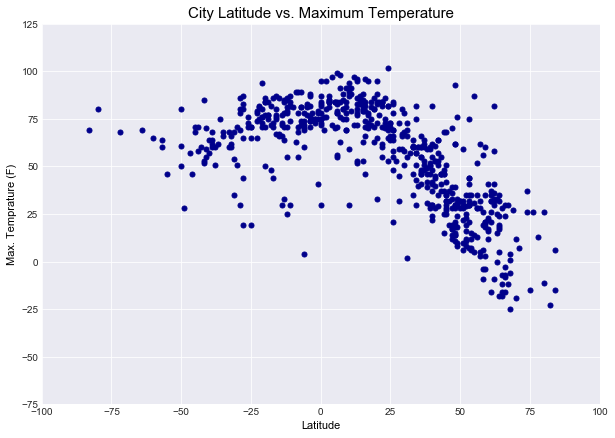

In [263]:
# Use seaborn to make the TEMPERATURE scatter plot
ax = sns.regplot(x='Lat', 
           y='Max Temp', 
           data=sample_df, 
           fit_reg=False,
           scatter_kws={"color":"darkblue","alpha":1,"s":25}) 

#Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(-100,100)
plt.ylim(-75,125)

#Make x-axis, y-axis & title labels
ax.axes.set_title('City Latitude vs. Maximum Temperature', fontsize=15,color="black",alpha=1)
ax.set_xlabel("Latitude",size = 11,color="black",alpha=1)
ax.set_ylabel("Max. Temprature (F)",size = 11,color="black",alpha=1)

ax.figure.set_size_inches(10,7)

sns.set_style("dark")

plt.show()

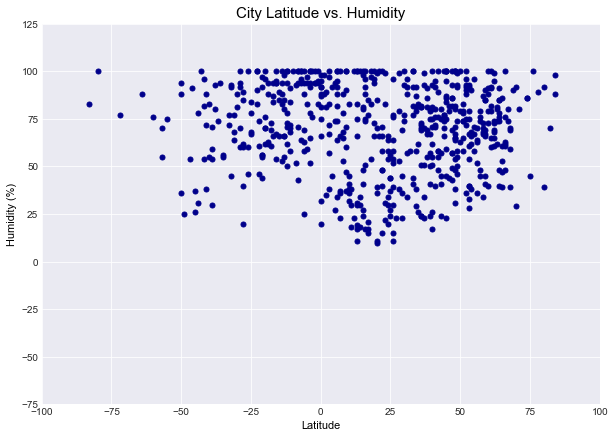

In [265]:
# Use seaborn to make the HUMIDITY scatter plot
ax = sns.regplot(x='Lat', 
           y='Humidity', 
           data=sample_df, 
           fit_reg=False,
           scatter_kws={"color":"darkblue","alpha":1,"s":25}) 

#Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(-100,100)
plt.ylim(-75,125)

#Make x-axis, y-axis & title labels
ax.axes.set_title('City Latitude vs. Humidity', fontsize=15,color="black",alpha=1)
ax.set_xlabel("Latitude",size = 11,color="black",alpha=1)
ax.set_ylabel("Humidity (%)",size = 11,color="black",alpha=1)

ax.figure.set_size_inches(10,7)

sns.set_style("dark")

plt.show()

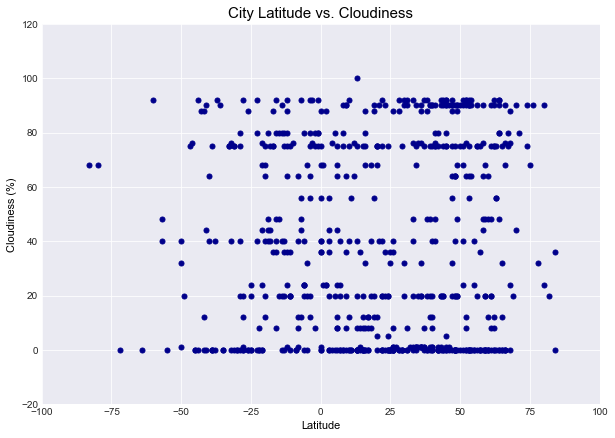

In [268]:
# Use seaborn to make the CLOUDINESS scatter plot
ax = sns.regplot(x='Lat', 
           y='Cloudiness', 
           data=sample_df, 
           fit_reg=False,
           scatter_kws={"color":"darkblue","alpha":1,"s":25}) 

#Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(-100,100)
plt.ylim(-20,120)

#Make x-axis, y-axis & title labels
ax.axes.set_title('City Latitude vs. Cloudiness', fontsize=15,color="black",alpha=1)
ax.set_xlabel("Latitude",size = 11,color="black",alpha=1)
ax.set_ylabel("Cloudiness (%)",size = 11,color="black",alpha=1)

ax.figure.set_size_inches(10,7)

sns.set_style("dark")

plt.show()

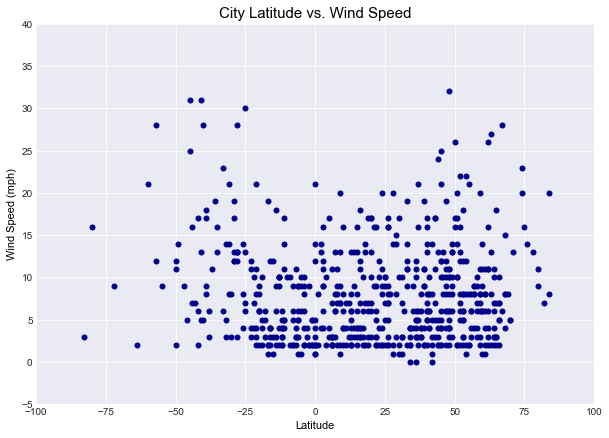

In [271]:
# Use seaborn to make the WIND SPEED scatter plot
ax = sns.regplot(x='Lat', 
           y='Wind Speed', 
           data=sample_df, 
           fit_reg=False,
           scatter_kws={"color":"darkblue","alpha":1,"s":25}) 

#Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(-100,100)
plt.ylim(-5,40)

#Make x-axis, y-axis & title labels
ax.axes.set_title('City Latitude vs. Wind Speed', fontsize=15,color="black",alpha=1)
ax.set_xlabel("Latitude",size = 11,color="black",alpha=1)
ax.set_ylabel("Wind Speed (mph)",size = 11,color="black",alpha=1)

ax.figure.set_size_inches(10,7)

sns.set_style("dark")

plt.show()